**Árboles de Decisión**

In [20]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score

In [17]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("Vinos.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
data.shape

(1599, 12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

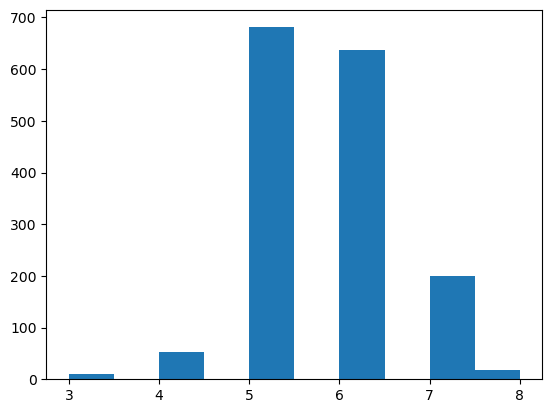

In [9]:
plt.hist(data.quality)

<Axes: xlabel='citric acid', ylabel='pH'>

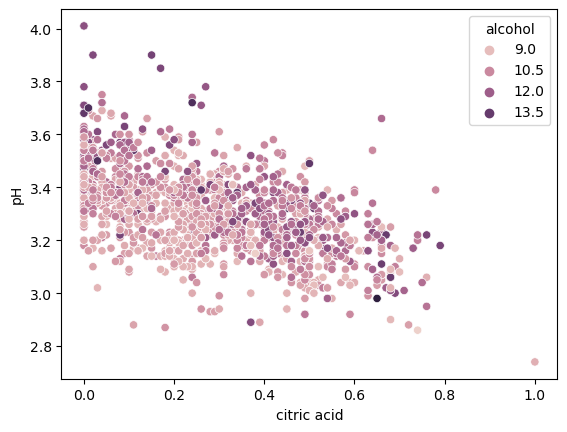

In [10]:
sns.scatterplot(x = "citric acid" , y = "pH" , hue = "alcohol" , data = data)

In [42]:
predictors_col = ["fixed acidity" , "volatile acidity" , "citric acid" , "residual sugar" , "chlorides" , "free sulfur dioxide" , "total sulfur dioxide" , "density" , "pH" , "sulphates" , "alcohol"]
target_col = ['quality']

In [43]:
predictors

,fixed acidity,volatile acidity,citric acid
0,7.4,0.700,0.00
1,7.8,0.880,0.00
2,7.8,0.760,0.04
3,11.2,0.280,0.56
4,7.4,0.700,0.00
...,...,...,...
1594,6.2,0.600,0.08
1595,5.9,0.550,0.10
1596,6.3,0.510,0.13
1597,5.9,0.645,0.12


In [32]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [33]:
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid
fixed acidity,1.000000,-0.256131,0.671703
volatile acidity,-0.256131,1.000000,-0.552496
citric acid,0.671703,-0.552496,1.000000


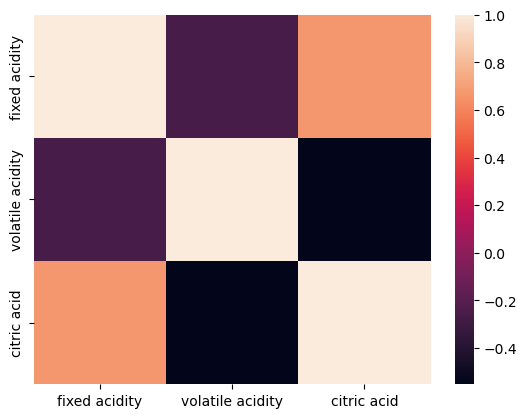

In [38]:
sns.heatmap(corr)
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.4, random_state=8)

In [46]:
tree = DecisionTreeClassifier()

In [47]:
arbol = tree.fit(X_train, y_train)

[Text(0.4619865846553671, 0.9821428571428571, 'x[1] <= 0.548\ngini = 0.643\nsamples = 959\nvalue = [7, 32, 407, 383, 121, 9]'),
 Text(0.18447378927353644, 0.9464285714285714, 'x[1] <= 0.335\ngini = 0.653\nsamples = 518\nvalue = [1, 11, 157, 241, 101, 7]'),
 Text(0.050535271455141265, 0.9107142857142857, 'x[2] <= 0.255\ngini = 0.638\nsamples = 133\nvalue = [0, 2, 21, 58, 51, 1]'),
 Text(0.00850234700203702, 0.875, 'x[0] <= 8.5\ngini = 0.494\nsamples = 9\nvalue = [0, 0, 6, 2, 1, 0]'),
 Text(0.005668231334691347, 0.8392857142857143, 'x[2] <= 0.15\ngini = 0.245\nsamples = 7\nvalue = [0, 0, 6, 0, 1, 0]'),
 Text(0.0028341156673456734, 0.8035714285714286, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(0.00850234700203702, 0.8035714285714286, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 6, 0, 0, 0]'),
 Text(0.011336462669382694, 0.8392857142857143, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0, 0]'),
 Text(0.0925681959082455, 0.875, 'x[0] <= 8.05\ngini = 0.618\nsamples = 124\nval

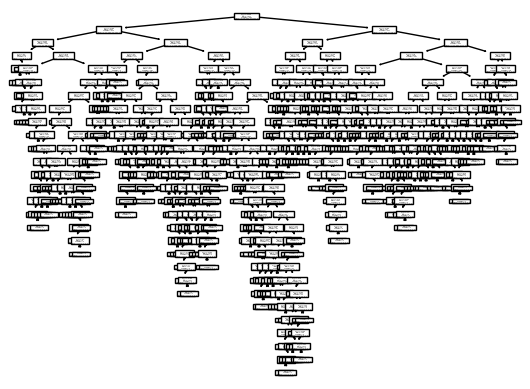

In [48]:
plot_tree(arbol)

In [50]:
predicciones = arbol.predict(X_test)

In [51]:
predicciones

array([5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 7, 6, 4, 5, 5, 5, 5, 6,
       7, 5, 6, 6, 6, 5, 5, 5, 6, 7, 5, 6, 4, 6, 6, 5, 6, 7, 5, 6, 6, 6,
       7, 7, 6, 7, 7, 6, 5, 6, 5, 5, 7, 5, 5, 7, 7, 5, 6, 6, 8, 6, 8, 7,
       6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 6, 4, 6, 5, 6, 5, 5, 5,
       5, 6, 6, 6, 5, 5, 5, 6, 6, 7, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 7,
       5, 8, 7, 5, 5, 7, 7, 7, 5, 5, 6, 6, 6, 5, 6, 4, 5, 5, 6, 7, 6, 5,
       6, 7, 7, 5, 7, 5, 6, 7, 5, 7, 6, 6, 6, 5, 8, 6, 7, 5, 5, 4, 5, 4,
       5, 5, 6, 5, 6, 7, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5, 6, 7, 6,
       5, 7, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 4, 5, 6, 6,
       5, 6, 6, 6, 6, 5, 5, 6, 7, 7, 5, 5, 6, 5, 5, 6, 7, 5, 6, 6, 5, 6,
       5, 5, 7, 7, 7, 6, 5, 5, 6, 5, 6, 6, 5, 7, 5, 6, 6, 7, 8, 5, 6, 6,
       7, 6, 6, 6, 7, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 7, 5, 5, 6, 6, 5, 5,
       4, 5, 6, 7, 5, 6, 5, 7, 5, 5, 6, 6, 5, 5, 5, 7, 5, 5, 6, 5, 6, 5,
       5, 7, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 6,

In [52]:
#Examinamos la matriz de confusión
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['predicciones'])

predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,2,1,0,0
4,0,1,7,13,0,0
5,0,6,150,94,20,4
6,0,12,68,143,26,6
7,1,1,12,22,38,4
8,0,0,0,7,2,0


In [56]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.51875